# Importing Keras libraries andImageDataGenerator from Keras

In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator

# Define The Parameters /Arguments For ImageDataGenerator Class

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

# Applying ImageDataGenerator functionality to trainset.

In [3]:
x_train = train_datagen.flow_from_directory(r"D:\Anaconda\Main project\Dataset\train_set",target_size = (128,128),batch_size = 32,class_mode = 'binary')

Found 436 images belonging to 2 classes.


# Applying ImageDataGenerator functionality to testset.

In [4]:
x_test = test_datagen.flow_from_directory(r"D:\Anaconda\Main project\Dataset\test_set",target_size = (128,128),batch_size = 32,class_mode = 'binary')

Found 121 images belonging to 2 classes.


# Importing Model Building Libraries

In [5]:
#import model building libraries...
#To define linear intialisation import sequential
from keras.models import Sequential
#To add layers import Dense
from keras.layers import Dense
#To create convolution kernal import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

# initializing the model

In [6]:
model = Sequential()

# Adding CNN Layers

In [7]:
model.add (Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

# Add Dense layers

In [8]:
#add hidden layer
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 150)               19051350  
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 19,052,397
Trainable params: 19,052,397
Non-trainable params: 0
____________________________________________

# configure the learning process

In [10]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ["accuracy"])

# training the model

In [11]:
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
14/14 [==============================] - 118s 7s/step - loss: 1.8812 - accuracy: 0.7110 - val_loss: 0.1588 - val_accuracy: 0.9421
Epoch 2/10
14/14 [==============================] - 75s 5s/step - loss: 0.3336 - accuracy: 0.8761 - val_loss: 0.2790 - val_accuracy: 0.9174
Epoch 3/10
14/14 [==============================] - 92s 7s/step - loss: 0.2306 - accuracy: 0.9014 - val_loss: 0.1209 - val_accuracy: 0.9669
Epoch 4/10
14/14 [==============================] - 97s 7s/step - loss: 0.1743 - accuracy: 0.9243 - val_loss: 0.1087 - val_accuracy: 0.9669
Epoch 5/10
14/14 [==============================] - 77s 6s/step - loss: 0.1677 - accuracy: 0.9427 - val_loss: 0.0905 - val_accuracy: 0.9669
Epoch 6/10
14/14 [==============================] - 78s 6s/step - loss: 0.1679 - accuracy: 0.9266 - val_loss: 0.0592 - val_accuracy: 0.9917
Epoch 7/10
14/14 [==============================] - 78s 6s/step - loss: 0.1811 - accuracy: 0.9266 - val_loss: 0.0593 - val_accuracy: 0.9917
Epoch 8/10
14/14 [=

# save the model

In [12]:
model.save("forest.h5")

# Predictions

In [13]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2

In [14]:
#load the saved model
model = load_model("forest.h5")

In [15]:
img=image.load_img(r'D:\Anaconda\Main project\Dataset\train_set\with fire\with fire (105).jpg')
x=image.img_to_array(img)
res = cv2.resize(x, dsize=(128,128),interpolation=cv2.INTER_CUBIC)
x=np.expand_dims(res,axis=0)

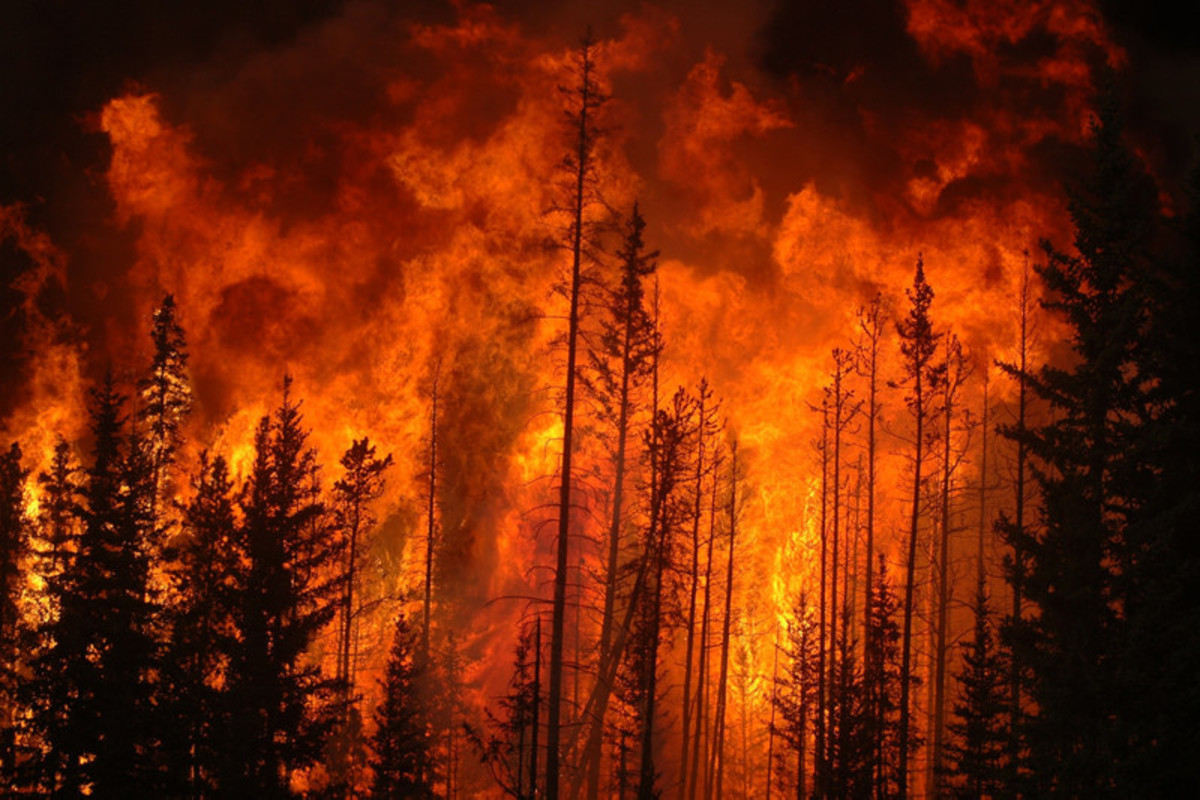

In [16]:
img

In [17]:
pred = model.predict(x)

1/1 [==============================] - 4s 4s/step


In [18]:
pred

array([[1.]], dtype=float32)

# Open cv for video processing

In [19]:
#import opencv library
import cv2
#import numpy
import numpy as np 
#import imag and load_model function from keras
from keras.preprocessing import image
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from PIL import Image
#import Client from twilio API
from twilio.rest import Client
#import playsound package
from playsound import playsound

In [20]:
#load the saved model
model = load_model(r'forest.h5')
#define video
video = cv2.VideoCapture(0)
#define the features
name = ['forest','with fire']

# Creating An Account in Twilio Service
Sending Alert Message

In [ ]:
while(True):
    ret,frame=video.read()
    img=image.load_img(r'D:\Anaconda\Main project\Dataset\train_set\with fire\with fire (105).jpg')
    x=image.img_to_array(img)
    res = cv2.resize(x, dsize=(128,128),interpolation=cv2.INTER_CUBIC)
    x=np.expand_dims(res,axis=0)
    pred = model.predict(x)
    if pred[0]==1:
        #twilio account ssid
        account_sid = 'AC3f73dcc73eb964ff8b6d46f8f57a8d86'
        #twilio account authentication token
        auth_token = 'bd27dc22501d6a933ef5916c2da45abd'
        client = Client(account_sid, auth_token)
        message = client.messages \
        .create(
        body='Forest Fire is detected, stay alert',
        #use twilio free number
        from_=' +13466448645',
        to='+916379947017')
        print(message.sid)
        print('Fire Detected')
        print ('SMS send!')
        playsound(r'D:\Anaconda\Main project\Dataset\Tornado Warning Siren Sound Effect freesound.mp3')
    else:
        print('No Danger')
        cv2.imshow("image.jpg",frame)
        if cv2.waitkey(2)&0xff == ord('q'):
            break
                  
video.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 77ms/step
SM8f657ddbf7aa10d8bcfe11c2ec2da69b
Fire Detected
SMS send!
